In [1]:
from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print (df)

    Year  Month  Interest_Rate  Unemployment_Rate  Stock_Index_Price
0   2017     12           2.75                5.3               1464
1   2017     11           2.50                5.3               1394
2   2017     10           2.50                5.3               1357
3   2017      9           2.50                5.3               1293
4   2017      8           2.50                5.4               1256
5   2017      7           2.50                5.6               1254
6   2017      6           2.50                5.5               1234
7   2017      5           2.25                5.5               1195
8   2017      4           2.25                5.5               1159
9   2017      3           2.25                5.6               1167
10  2017      2           2.00                5.7               1130
11  2017      1           2.00                5.9               1075
12  2016     12           2.00                6.0               1047
13  2016     11           1.75    

In [12]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
Year,1,0,0.882851,-0.877,0.863232
Month,0,1,0.339526,-0.351189,0.481287
Interest_Rate,0.882851,0.339526,1,-0.925814,0.935793
Unemployment_Rate,-0.877,-0.351189,-0.925814,1,-0.922338
Stock_Index_Price,0.863232,0.481287,0.935793,-0.922338,1


In [13]:
from sklearn import linear_model
import statsmodels.api as sm
X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']

In [5]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1798.4039776258546
Coefficients: 
 [ 345.54008701 -250.14657137]


In [6]:
# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

Predicted Stock Index Price: 
 [1422.86238865]


In [7]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 21 Jun 2019   Prob (F-statistic):           4.04e-11
Time:                        15:42:41   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

In [8]:
predictions

0     1422.862389
1     1336.477367
2     1336.477367
3     1336.477367
4     1311.462710
5     1261.433395
6     1286.448053
7     1200.063031
8     1200.063031
9     1175.048374
10    1063.648695
11    1013.619381
12     988.604723
13     927.234359
14     952.249016
15     877.205045
16     852.190387
17     877.205045
18     877.205045
19     877.205045
20     927.234359
21     852.190387
22     852.190387
23     877.205045
dtype: float64

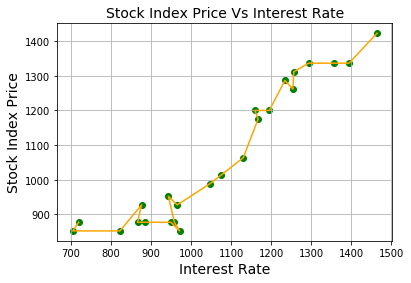

In [24]:
import matplotlib.pyplot as plt

plt.scatter(Y, predictions, color='green')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.plot(Y, predictions, linestyle='solid', color='orange')
plt.grid(True)
plt.show()

In [ ]:
#https://datatofish.com/